In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# The components of a plot

Plots made with the matplotlib consist of a figure, which in turn contains all axes objects, where plots are drawn. Accessing the figure and axes is easier, when using `plt.subplots()`.

Plotting now is quite similar as before. A lot of `plt.something` commands can can be replaced with `ax.something`, but careful, this does not work all the time.

#### Data

In [3]:
df = 10
X = np.linspace(0, 50, num=500)
Y = np.exp(-X/df) * np.sin(X)
Z = np.exp(-X/df) * np.cos(X)

#### Plot

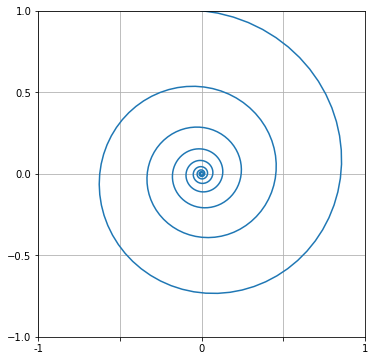

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(Y, Z)
ax.set_aspect(1)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_xticklabels([-1,'',0,'',1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.grid()

This approach makes it easy to have many axes in one figure:

# Multiple of plots in one figure

Setting up grids of plots can be done in several ways.
- fig.add_subplot
- plt.subplot2grid
- plt.gridspec

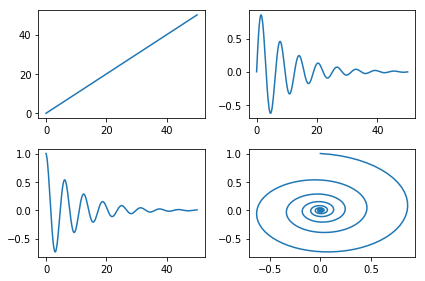

In [5]:
fig, AX = plt.subplots(2,2)
AX = AX.flat

for ax, (x, y) in zip(AX, [[X, X], [X,Y],[X,Z],[Y,Z]]):
    ax.plot(x, y)
    
fig.tight_layout()

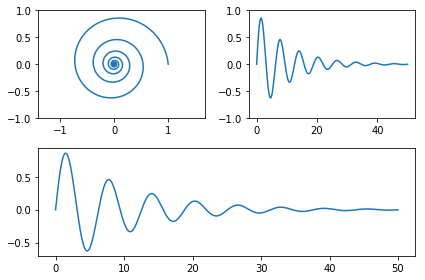

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(212)
ax1.plot(X, Y)
ax2 = fig.add_subplot(221)
ax2.plot(Z, Y)
ax2.set_aspect(1)
ax3 = fig.add_subplot(222, sharey=ax2)
ax3.plot(X, Y)
ax3.set_ylim(-1,1)

fig.tight_layout()

Complex Plots can be created with a `GridSpec` instance. When creating the object one has to specify the number of rows and columns the grid has. Later one can use the gridSpec to add axes and specify where they should be placed on the grid and how many columns they should span.

In [67]:
import matplotlib.gridspec as gridspec

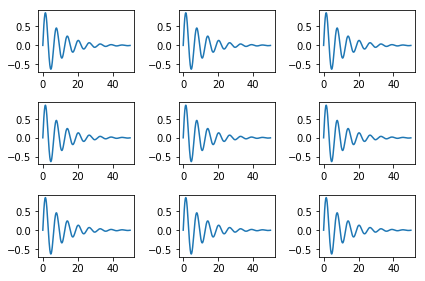

In [68]:
gs = gridspec.GridSpec(3,3)
for i in range(9):
    ax = plt.subplot(gs[i])
    ax.plot(X, Y)
fig = plt.gcf().tight_layout()

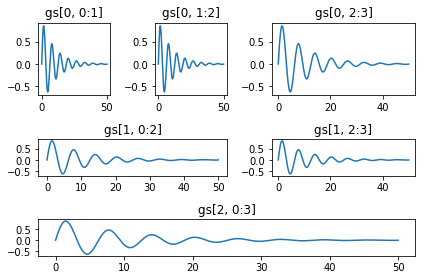

In [69]:
gs = gridspec.GridSpec(3,3, width_ratios=[1,1,2], height_ratios=[2,1,1])
slices = [[0, 0, 1], [0, 1, 1], [0, 2, 1],
          [1, 0, 2],[1, 2, 1],
          [2, 0, 3]]
for x, y, y_sp in slices:
    ax = plt.subplot(gs[x, y:y+y_sp])
    ax.plot(X, Y)
    ax.set_title('gs[{}, {}:{}]'.format(x, y, y+y_sp))
fig = plt.gcf().tight_layout()

### Nested grids

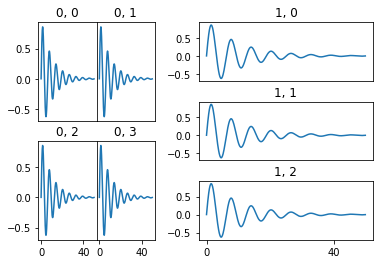

In [115]:
outer_grid = gridspec.GridSpec(1,2, width_ratios=[1,1.5])
outer_grid.update(wspace=0.3)

inner_1 = gridspec.GridSpecFromSubplotSpec(2,2, subplot_spec=outer_grid[0], wspace=0, hspace=0.2)
inner_2 = gridspec.GridSpecFromSubplotSpec(3,1, subplot_spec=outer_grid[1], hspace=0.35)
all_specs = [inner_1, inner_2]

fig = plt.figure()
for i, spec in enumerate(all_specs):
    for j, gs in enumerate(spec):
        ax = fig.add_subplot(gs)
        ax.plot(X, Y)
        if not ax.is_first_col():
            ax.set_yticks([])
        if not ax.is_last_row():
            ax.set_xticks([])
        else:
            ax.set_xticks([0,40])
        ax.set_title('{}, {}'.format(i,j))

# fig.tight_layout()